In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use("ggplot")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import networkx as nx
import json

In [2]:
df = pd.read_csv('../data_collection/data/processed_data/model_2_data_990.csv')

In [3]:

print(df.head().to_latex(index=False,
                  float_format="{:.1f}".format, longtable=True))

\begin{longtable}{llrrrrrrrrrrrrrrrrrrrr}
\toprule
nominator & validator & era & proportional_bond & total_bond & number_of_validators & solution_bond & validator_frequency_current_era & prev_min_stake & prev_sum_stake & prev_variance_stake & overall_proportional_bond & overall_total_bond & average_proportional_bond & average_total_bond & nominator_index & validator_index & nominator_degree & validator_degree & nominator_centrality & validator_centrality & probability_of_selection \\
\midrule
\endfirsthead
\toprule
nominator & validator & era & proportional_bond & total_bond & number_of_validators & solution_bond & validator_frequency_current_era & prev_min_stake & prev_sum_stake & prev_variance_stake & overall_proportional_bond & overall_total_bond & average_proportional_bond & average_total_bond & nominator_index & validator_index & nominator_degree & validator_degree & nominator_centrality & validator_centrality & probability_of_selection \\
\midrule
\endhead
\midrule
\multicolumn{2

In [4]:
df.head()

,nominator,validator,era,proportional_bond,total_bond,number_of_validators,solution_bond,validator_frequency_current_era,prev_min_stake,prev_sum_stake,...,overall_total_bond,average_proportional_bond,average_total_bond,nominator_index,validator_index,nominator_degree,validator_degree,nominator_centrality,validator_centrality,probability_of_selection
0,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,12MqEB7VLqKRgxCoGZXriPuo4GNYtaFiQ1tjMZhooPXAycM2,990,2.000000e+16,320000000000000001,16,8.094832e+15,4.0,17010000000000000,6105577224054410002,...,464998900000000001,1.073805e+16,1.162497e+17,0,21901,16,4,0.000721,0.000180,0.999908
1,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,12eZSMk8GJYE2Lq943dSEnMUoZs1ek7jU8QN3rEA1yPZPjcR,990,2.000000e+16,320000000000000001,16,2.198072e+16,1.0,17010000000000000,6105577224054410002,...,320000000000000001,2.000000e+16,3.200000e+17,0,21905,16,1,0.000721,0.000045,0.991906
2,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,16Fwe1wFveAWmUJ8WucZmu87iyp5464m9hNqvUP8oE35nwc8,990,2.000000e+16,320000000000000001,16,2.198072e+16,1.0,17010000000000000,6105577224054410002,...,320000000000000001,2.000000e+16,3.200000e+17,0,21914,16,1,0.000721,0.000045,0.991901
3,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,1eLUhRLQiikdt4zUrYdY4LwdwYDsStmjrqzGzC46XmuTatG,990,2.000000e+16,320000000000000001,16,1.550430e+16,2.0,17010000000000000,6105577224054410002,...,374999900000000001,1.458332e+16,1.875000e+17,0,21902,16,2,0.000721,0.000090,0.998786
4,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,168bhPTpsgByfKqM2pgUfZ2wPxQQpgTwxsA9iTV7vAN4wQiU,990,2.000000e+16,320000000000000001,16,2.198072e+16,1.0,17010000000000000,6105577224054410002,...,320000000000000001,2.000000e+16,3.200000e+17,0,21913,16,1,0.000721,0.000045,0.991901


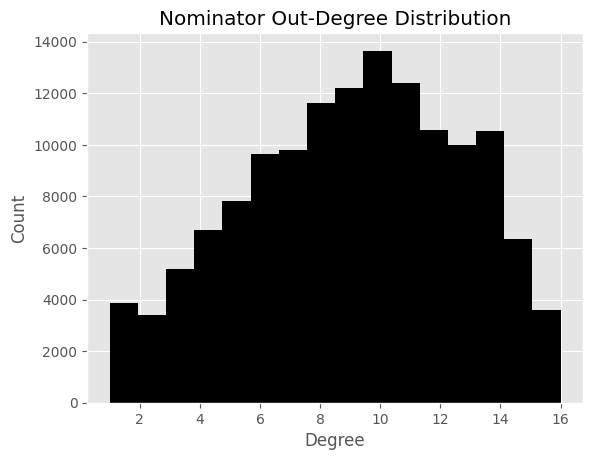

In [44]:
plt.hist(df['nominator_degree'], bins=16, color="black")
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Nominator Out-Degree Distribution')
plt.savefig("./images/nominator_out_degree_distribution.png", bbox_inches='tight', dpi=300)

In [6]:
era = 990
with open(f'../data_collection/data/snapshot_data/{era}_snapshot.json') as f:
    data = json.load(f)

In [7]:
nominator_validator_preference_counts = []
for row in data['voters']:
    nominator_validator_preference_counts.append(len(row[2]))
nominator_validator_preference_counts = pd.DataFrame(nominator_validator_preference_counts)
nominator_validator_preference_counts.columns = ['nominator_validator_preference_counts']

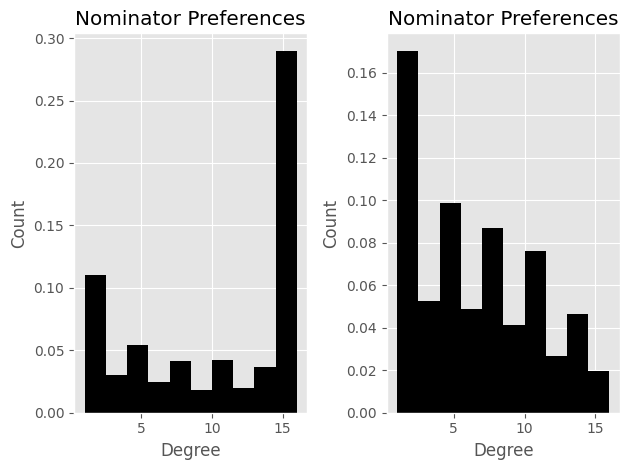

In [67]:
fig, axes = plt.subplots(1, 2)

nominator_validator_preference_counts.hist("nominator_validator_preference_counts", ax=axes[0], color="black", density=True)
df.groupby('nominator')['nominator_degree'].first().reset_index().hist('nominator_degree', ax=axes[1], color="black", density=True)
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Count')
axes[0].set_title('Nominator Preferences')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Count')
axes[1].set_title('Nominator Preferences')
fig.tight_layout()
plt.savefig("./images/nominator_preferences.png", bbox_inches='tight', dpi=300)
plt.show()

In [77]:
nominator_validator_preference_counts.value_counts().sum()

22500

In [9]:
validator_count = {}
for row in data['voters']:
    for validator in row[2]:
        if validator in data['targets']:
            if validator in validator_count.keys():
                validator_count[validator] += 1
            else:
                validator_count[validator] = 1


In [10]:
count_validators_df = pd.DataFrame(validator_count.values())
count_validators_df.columns = ['count']

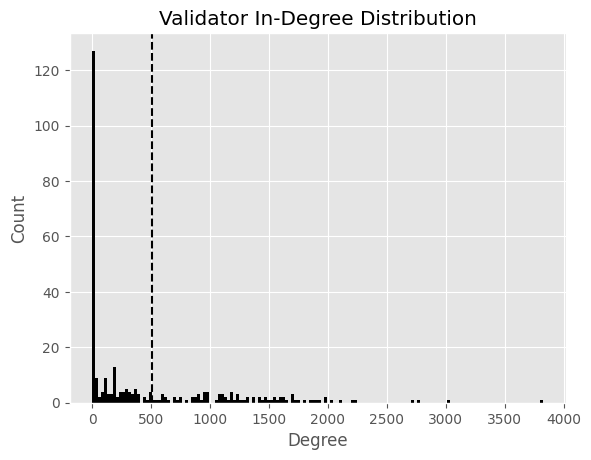

In [25]:
plt.hist(df.groupby('validator')['validator_degree'].first(), bins=150, color="black")
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Validator In-Degree Distribution')
plt.axvline(x=512, color='black', linestyle='--')
plt.savefig("./images/validator_in_degree_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

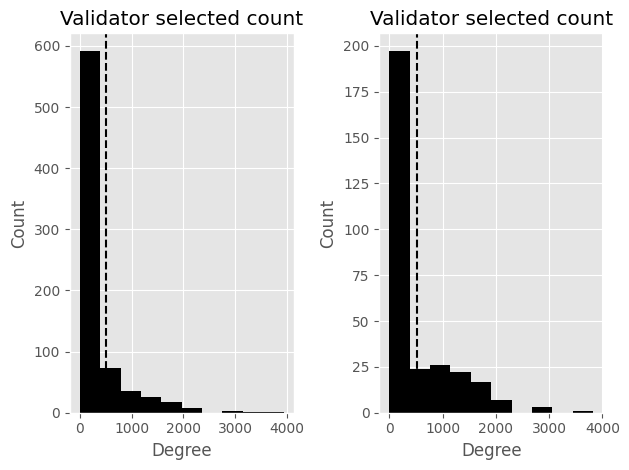

In [79]:
fig, axes = plt.subplots(1, 2)

count_validators_df.hist('count', ax=axes[0], color="black")
df.groupby('validator')['validator_degree'].first().reset_index().hist('validator_degree', ax=axes[1], color="black")
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Count')
axes[0].set_title('Validator selected count')
axes[0].axvline(x=512, color='black', linestyle='--')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Count')
axes[1].set_title('Validator selected count')
axes[1].axvline(x=512, color='black', linestyle='--')
fig.tight_layout()
plt.savefig("./images/validator_selected_count.png", bbox_inches='tight', dpi=300)
plt.show()


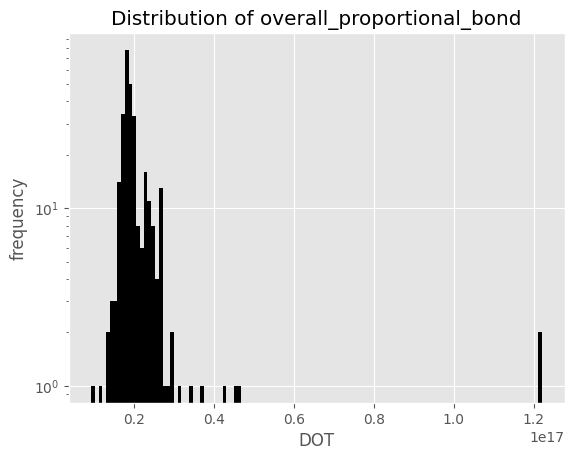

In [56]:
bins = np.histogram_bin_edges(df.groupby("validator")['overall_proportional_bond'].nth(0), bins="auto")
plt.hist(df.groupby("validator")['overall_proportional_bond'].nth(0), bins=bins, alpha=1, color="black")
plt.yscale('log')
plt.title("Distribution of overall_proportional_bond")
plt.xlabel("DOT")
plt.ylabel("frequency")
plt.savefig("./images/overall_proportional_bond.png", bbox_inches='tight', dpi=300)
plt.show()

In [14]:
df.groupby("validator")['overall_proportional_bond'].nth(0).describe()

count    2.970000e+02
mean     2.059264e+16
std      9.354937e+15
min      9.166650e+15
25%      1.774499e+16
50%      1.871506e+16
75%      2.090073e+16
max      1.220699e+17
Name: overall_proportional_bond, dtype: float64

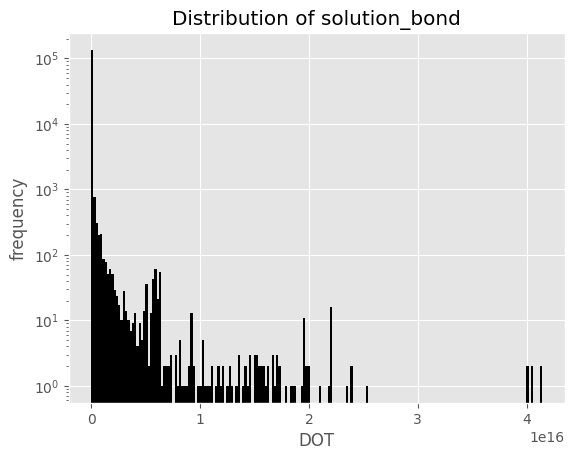

In [46]:

plt.hist(df['solution_bond'], bins=200, alpha=1, color="black")
plt.title("Distribution of solution_bond")
plt.yscale('log')
plt.xlabel("DOT")
plt.ylabel("frequency")
plt.savefig("./images/solution_bond.png", bbox_inches='tight', dpi=300)
plt.show()

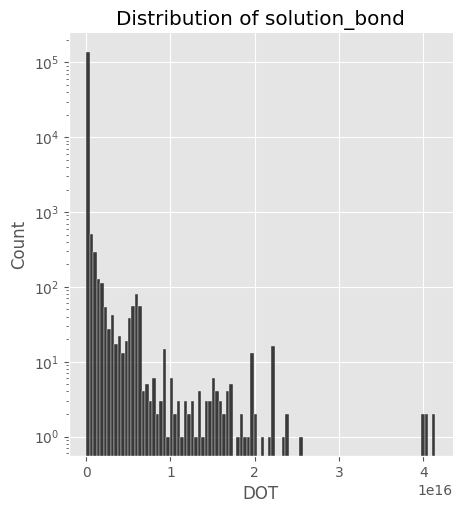

In [55]:
bins = np.histogram_bin_edges(df['solution_bond'], bins="auto")
sns.displot(df['solution_bond'], bins=100, color="black")
plt.title("Distribution of solution_bond")
plt.yscale('log')
plt.xlabel("DOT")
plt.savefig("./images/solution_bond.png", bbox_inches='tight', dpi=300)
plt.show()

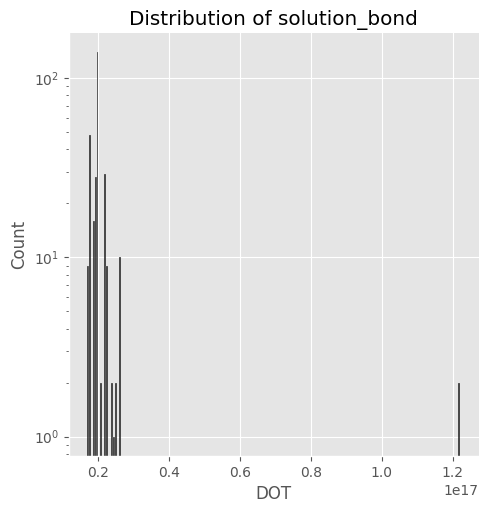

In [48]:
sns.displot(df.groupby("validator")['solution_bond'].sum(), bins=200, color="black")
plt.yscale('log')
plt.title("Distribution of solution_bond")
plt.xlabel("DOT")
plt.savefig("./images/solution_bond.png", bbox_inches='tight', dpi=300)
plt.show()

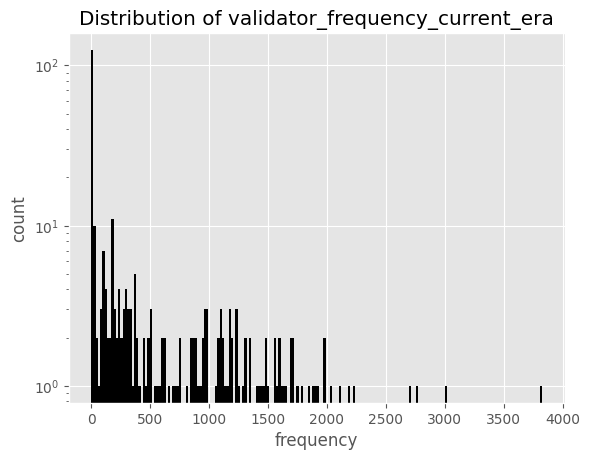

In [49]:
plt.hist(df.groupby("validator")['validator_frequency_current_era'].first(), bins=200, alpha=1, color="black")
plt.yscale('log')
plt.title("Distribution of validator_frequency_current_era")
plt.xlabel("frequency")
plt.ylabel("count")
plt.savefig("./images/validator_frequency_current_era.png", bbox_inches='tight', dpi=300)
plt.show()

# prediction


In [214]:


import pickle

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import (
    GradientBoostingRegressor,
    GradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from lightgbm.sklearn import LGBMRegressor, LGBMClassifier
from lightgbm import plot_metric
import pandas as pd
from sklearn.model_selection import learning_curve, validation_curve
from src.score import ScoringTool
import lightgbm as lgb
from src.adjustment import AdjustmentTool
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, accuracy_score, explained_variance_score, mean_absolute_percentage_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor, XGBClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [215]:
mse = []
mape = []
mae = []
predictions = []
feature_importances = []
r2 = []
for test_era in range(1003,1033):
    dataframes = []
    for era in range(test_era - 200, test_era + 1):
        dataframes.append(pd.read_csv(f"../data_collection/data/processed_data/model_2_data_grouped_{era}.csv"))
    dataframe = pd.concat(dataframes)
    features = [
        "validator",
        "proportional_bond",
        "total_bond",
        "validator_frequency_current_era",
        "validator_centrality",
        "probability_of_selection",
        "era"
  ]
    target = "solution_bond"
    X = dataframe.loc[:, features]
    y = dataframe.loc[:, target]
    drop_columns = X.select_dtypes(include=["object"]).columns
    X_train = X[X["era"] != test_era].drop(drop_columns, axis=1)
    X_train = X_train.drop(["era"], axis=1)
    X_test = X[X["era"] == test_era].drop(drop_columns, axis=1)
    X_test = X_test.drop(["era"], axis=1)
    y_train = y[X["era"] != test_era]
    y_test = y[X["era"] == test_era]


    transform_columns = X_train.select_dtypes(exclude=["object"]).columns
    column_transformer = make_column_transformer(
        (
            MinMaxScaler(),
            transform_columns,
        ),
        remainder="passthrough",
    )
    X_train = column_transformer.fit_transform(X_train)
    X_test = column_transformer.transform(X_test)


    model = LGBMRegressor(
                random_state=42,
                cat_smooth=64,
                colsample_bytree=1.0,
                learning_rate=0.10837785148000703,
                max_depth=1,
                min_child_samples=10,
                n_estimators=100,
                num_leaves=216,
                reg_alpha=0.6330795286590103,
                reg_lambda=0.2770756544189646,
                subsample=0.5
            )
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                           callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
                           )
    mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
    mape.append(mean_absolute_percentage_error(y_test, model.predict(X_test)))
    predictions.append(model.predict(X_test))
    feature_importances.append(model.feature_importances_)
    r2.append(r2_score(y_test, model.predict(X_test)))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    #plot_metric(model, metric='l2', figsize=(10, 10))

filename = f"../models/trained_models/lgbm.pkl"
pickle.dump(model, open(filename, "wb"))
filename = f"../models/trained_models/lgbm_scaler.pkl"
pickle.dump(column_transformer, open(filename, "wb"))



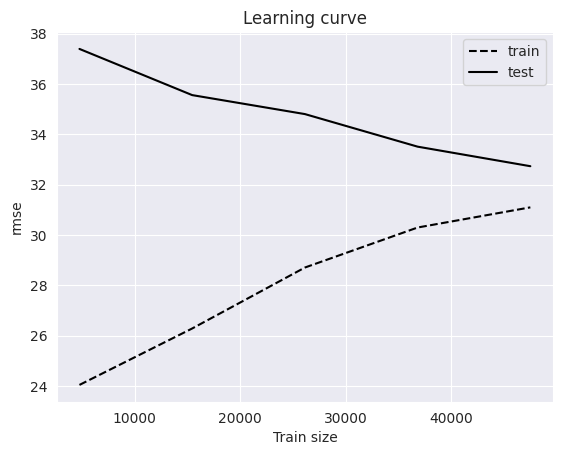

In [193]:
#plot learning curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error"
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label="train", color="black", linestyle="--")
plt.plot(train_sizes, test_scores_mean, label="test", color="black", linestyle="-")
plt.xlabel("Train size")
plt.ylabel("rmse")
plt.legend()
plt.title("Learning curve")
plt.savefig("./images/learning_curve_m2.png", bbox_inches='tight', dpi=300)
plt.show()


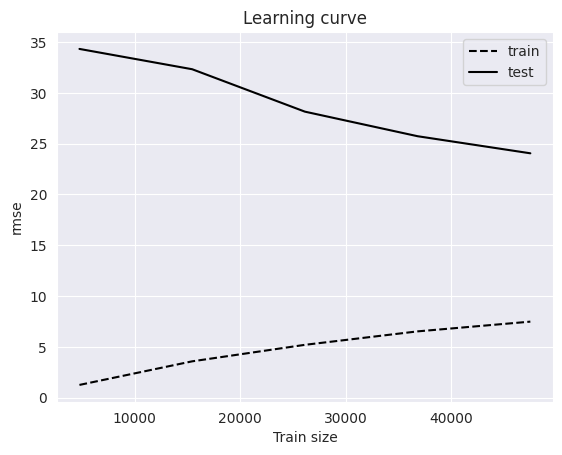

In [188]:
#plot learning curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error"
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label="train", color="black", linestyle="--")
plt.plot(train_sizes, test_scores_mean, label="test", color="black", linestyle="-")
plt.xlabel("Train size")
plt.ylabel("rmse")
plt.legend()
plt.title("Learning curve")
plt.savefig("./images/learning_curve_m2_v2.png", bbox_inches='tight', dpi=300)
plt.show()


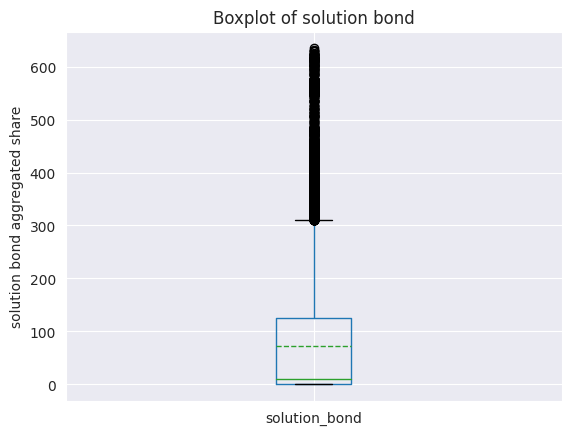

In [211]:
dataframe['solution_bond'].to_frame().boxplot(meanline=True, showmeans=True)
plt.title('Boxplot of solution bond')
plt.ylabel('solution bond aggregated share')
plt.savefig("./images/boxplot_m2_solutionbond.png", bbox_inches='tight', dpi=300)

In [213]:
print(dataframe.describe())

       proportional_bond    total_bond  validator_frequency_current_era   
count       5.969700e+04  5.969700e+04                     5.969700e+04  \
mean        2.050400e+16  1.755325e+17                     6.339332e+05   
std         9.176867e+15  1.022631e+17                     1.441828e+06   
min         4.336352e+15  1.308148e+16                     1.000000e+00   
25%         1.749445e+16  1.070558e+17                     9.000000e+00   
50%         1.882204e+16  1.629665e+17                     1.296000e+03   
75%         2.187255e+16  2.515619e+17                     5.198410e+05   
max         1.226001e+17  9.009051e+17                     1.728896e+07   

       solution_bond  probability_of_selection          era  prev_min_stake   
count   59697.000000              59697.000000  59697.00000    5.969700e+04  \
mean       73.385212                  0.977970    932.00000    1.679248e+16   
std       106.425905                  0.097501     58.02347    1.836582e+15   
min     

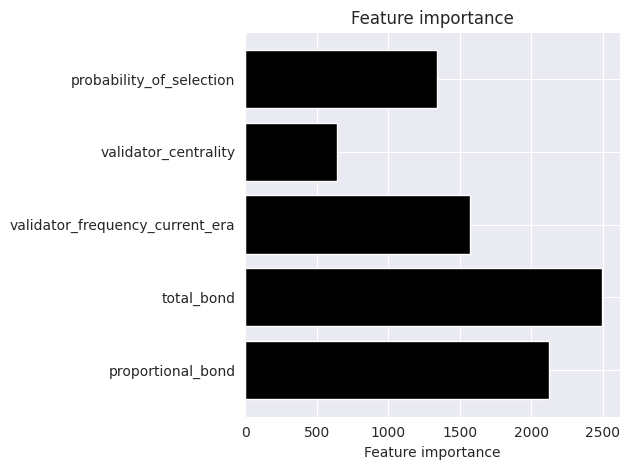

In [35]:
plt.barh(features[1:-1], np.mean(feature_importances, axis=0), color="black")
plt.title("Feature importance")
plt.xlabel("Feature importance")
plt.tight_layout()
plt.savefig("./images/feature_importance_m2.png", bbox_inches='tight', dpi=300)

In [44]:
print(np.min(y_train))

1.7020923566586214e+16


In [8]:
#normalize mse's
diff_max_min = y_test.max() - y_test.min()
mse_normalized = [x/diff_max_min for x in mse]

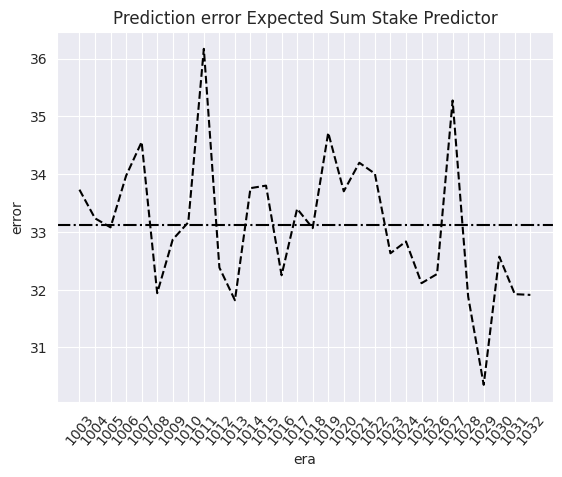

In [219]:
plt.plot(mse, color= "black", ls='--')
plt.ylabel('error')
plt.xlabel('era')
plt.axhline(np.mean(mse), c='black', ls='-.')
plt.title('Prediction error Expected Sum Stake Predictor')
plt.xticks(range(30), range(1003,1033), rotation=50)
plt.savefig("./images/prediction_error_model_2.png", bbox_inches='tight', dpi=300)


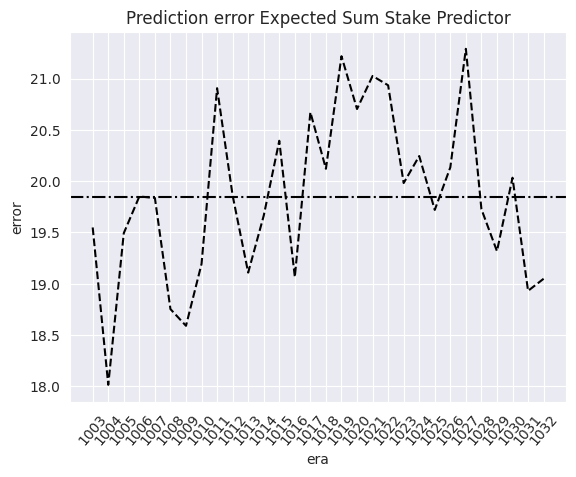

In [218]:
plt.plot(mae, color= "black", ls='--')
plt.ylabel('error')
plt.xlabel('era')
plt.axhline(np.mean(mae), c='black', ls='-.')
plt.title('Prediction error Expected Sum Stake Predictor')
plt.xticks(range(30), range(1003,1033), rotation=50)
plt.savefig("./images/prediction_error_model_2_mae.png", bbox_inches='tight', dpi=300)


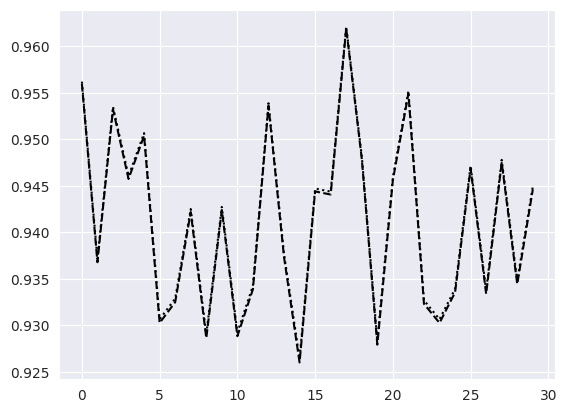

In [90]:
plt.plot(Adj_r2, color= "black", ls='--')
plt.plot(r2, color= "black", ls=':')

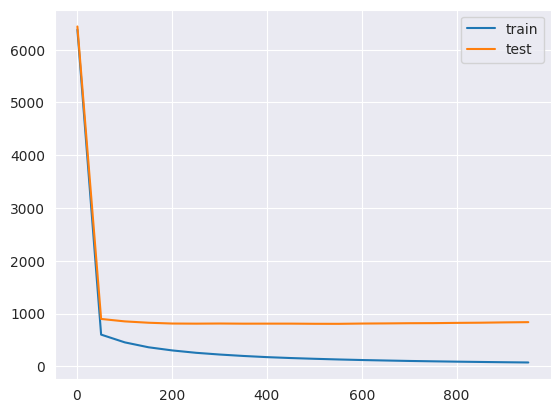

In [74]:
# plot validation curve
param_range = np.arange(1, 1000, 50)
train_scores, test_scores = validation_curve(
    model,
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="neg_mean_squared_error",
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(param_range, train_scores_mean, label="train")
plt.plot(param_range, test_scores_mean, label="test")
plt.legend()
plt.savefig("./images/validation_curve_model_2.png", bbox_inches='tight', dpi=300)
plt.show()


(array([132.,   8.,  15.,   7.,   6.,   3.,   3.,   7.,   5.,   5.,   6.,
          5.,   3.,   4.,   4.,   3.,   4.,   2.,   2.,   2.,   0.,   2.,
          2.,   3.,   3.,   1.,   1.,   1.,   2.,   3.,   4.,   5.,   3.,
          4.,   3.,   3.,   0.,   3.,   3.,   1.,   1.,   2.,   2.,   2.,
          0.,   1.,   0.,   1.,   0.,   1.,   2.,   1.,   0.,   1.,   2.,
          1.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([6.62237850e-02, 6.27072545e+00, 1.24752271e+01, 1.86797288e+01,
        2.48842304e+01, 3.10887321e+01, 3.72932338e+01, 4.34977354e+01,
        4.97022371e+01, 5.59067388e+01, 6.21112404e+01, 6.83157421e+01,
        7.45202438e+01, 8.07247454e+01, 8.69292471e+01, 9.31337488e+01,
        9.93382504e+01, 1.0554

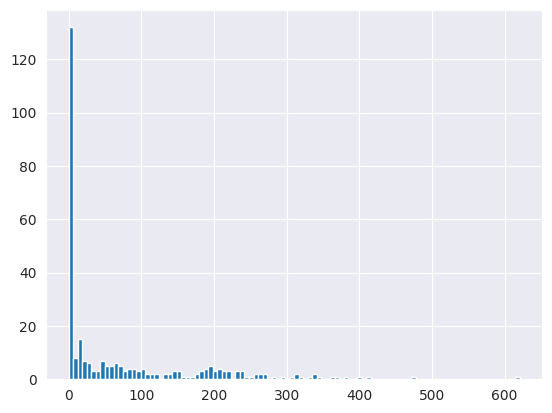

In [10]:
plt.hist(y_test, bins=100)